In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima

In [37]:
df=pd.read_csv('df3_final.csv')

In [38]:
df.head()

,date_visite_diagnostiqueur,estimation_ges,annee_construction,surface_habitable,code_insee_commune,geo_score,tv016_departement_code,longitude,latitude,year,month,day,time,asset_cre_target
0,2011-01-26,5.00,1947.0,71.50,19031.0,0.54,19.0,1.534671,45.154174,2011.0,23641,26.0,7.0,8.4
1,2011-04-04,14.00,1947.0,23.10,71153.0,0.74,71.0,4.426975,46.793673,2011.0,23641,4.0,75.0,8.4
2,2011-06-17,38.00,1974.0,171.60,75009.0,0.60,75.0,2.262997,48.919624,2011.0,23641,17.0,149.0,13.0
3,2011-06-20,13.64,1949.0,24.75,78048.0,0.35,78.0,1.668712,48.802809,2011.0,23641,20.0,152.0,13.0
4,2011-08-31,14.00,1947.0,23.10,84003.0,0.96,84.0,5.396156,43.876791,2011.0,23641,31.0,224.0,13.0


In [39]:
# Conversion en datetime
df['date_visite_diagnostiqueur'] = pd.to_datetime(df['date_visite_diagnostiqueur'])
df['month']=df['date_visite_diagnostiqueur'].dt.to_period('M')
df['days_elapsed'] = df['time'] + 19  # Ajoute 19 jours
df = df.drop(columns=['time'])  # Supprime l'ancienne colonne si nécessaire
df.head()

df.head()

,date_visite_diagnostiqueur,estimation_ges,annee_construction,surface_habitable,code_insee_commune,geo_score,tv016_departement_code,longitude,latitude,year,month,day,asset_cre_target,days_elapsed
0,2011-01-26,5.00,1947.0,71.50,19031.0,0.54,19.0,1.534671,45.154174,2011.0,2011-01,26.0,8.4,26.0
1,2011-04-04,14.00,1947.0,23.10,71153.0,0.74,71.0,4.426975,46.793673,2011.0,2011-04,4.0,8.4,94.0
2,2011-06-17,38.00,1974.0,171.60,75009.0,0.60,75.0,2.262997,48.919624,2011.0,2011-06,17.0,13.0,168.0
3,2011-06-20,13.64,1949.0,24.75,78048.0,0.35,78.0,1.668712,48.802809,2011.0,2011-06,20.0,13.0,171.0
4,2011-08-31,14.00,1947.0,23.10,84003.0,0.96,84.0,5.396156,43.876791,2011.0,2011-08,31.0,13.0,243.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401820 entries, 0 to 401819
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date_visite_diagnostiqueur  401820 non-null  datetime64[ns]
 1   estimation_ges              401820 non-null  float64       
 2   annee_construction          401820 non-null  float64       
 3   surface_habitable           401820 non-null  float64       
 4   code_insee_commune          401820 non-null  float64       
 5   geo_score                   401820 non-null  float64       
 6   tv016_departement_code      401820 non-null  float64       
 7   longitude                   401820 non-null  float64       
 8   latitude                    401820 non-null  float64       
 9   year                        401820 non-null  float64       
 10  month                       401820 non-null  period[M]     
 11  day                         401820 non-

C:\Users\tomde\AppData\Local\Temp\ipykernel_7156\172762320.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['estimation_ges'].dropna())


<Axes: xlabel='estimation_ges', ylabel='Density'>

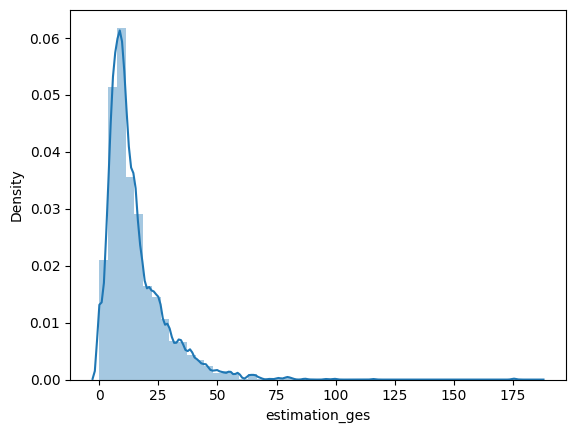

In [41]:
plt.figure()
sns.distplot(df['estimation_ges'].dropna())

In [42]:
def weighted_avg(x):
    valid = x.dropna(subset=['estimation_ges', 'surface_habitable'])
    # Exclure les lignes où estimation_ges est nul (0)
    valid = valid[valid['estimation_ges'] != 0]
    
    total_surface = valid['surface_habitable'].sum()
    if total_surface != 0:
        return (valid['estimation_ges'] * valid['surface_habitable']).sum() / total_surface
    return None





# --- Agrégation par mois ---
aggregation_month = df.groupby(['asset_cre_target', 'month']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_month').dropna()


C:\Users\tomde\AppData\Local\Temp\ipykernel_7156\1915983186.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregation_month = df.groupby(['asset_cre_target', 'month']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_month').dropna()


In [43]:
aggregation_month['month']

0      2013-04
1      2013-05
2      2013-06
3      2013-07
4      2013-08
        ...   
734    2024-10
735    2024-11
736    2024-12
737    2025-01
738    2025-04
Name: month, Length: 739, dtype: period[M]

In [44]:
aggregation_month.columns

Index(['asset_cre_target', 'month', 'weighted_estimation_ges_month'], dtype='object')

In [45]:
aggregation_month=aggregation_month.set_index('month')


In [46]:
# Filtrer les données où l'index est supérieur ou égal à 2013
aggregation_month = aggregation_month[aggregation_month.index >= '2013-01-01']

In [47]:
df_centre_commercial = aggregation_month[aggregation_month['asset_cre_target'] == 7.7]
df_batiment_a_usage_principal_bureau_administration_enseignement = aggregation_month[aggregation_month['asset_cre_target'] == 8.4]
df_batiment_a_occupation_continue = aggregation_month[aggregation_month['asset_cre_target'] == 13]
df_autres_cas = aggregation_month[aggregation_month['asset_cre_target'] == 15.94]
df_autres = aggregation_month[aggregation_month['asset_cre_target'] == 13]


In [48]:
df_batiment_a_usage_principal_bureau_administration_enseignement.head()

,asset_cre_target,weighted_estimation_ges_month
month,,
2013-01,8.4,11.000000
2013-02,8.4,40.904129
2013-03,8.4,41.002031
2013-04,8.4,12.620099
2013-05,8.4,17.211930


In [49]:
df_centre_commercial = df_centre_commercial.drop('asset_cre_target', axis=1)
df_batiment_a_usage_principal_bureau_administration_enseignement = df_batiment_a_usage_principal_bureau_administration_enseignement.drop('asset_cre_target', axis=1)
df_batiment_a_occupation_continue = df_batiment_a_occupation_continue.drop('asset_cre_target', axis=1)
df_autres_cas = df_autres_cas.drop('asset_cre_target', axis=1)
df_autres = df_autres.drop('asset_cre_target', axis=1)

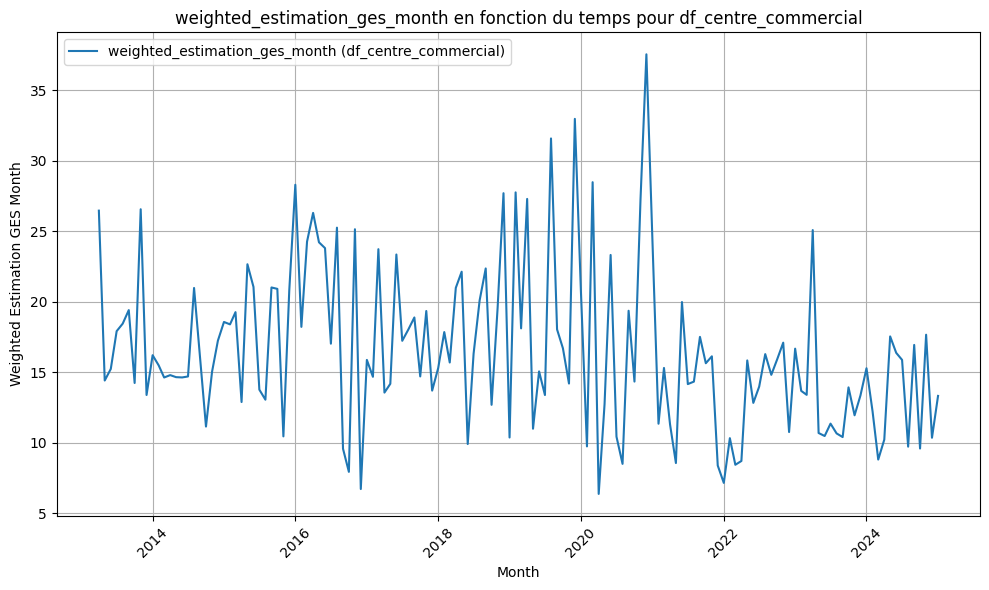

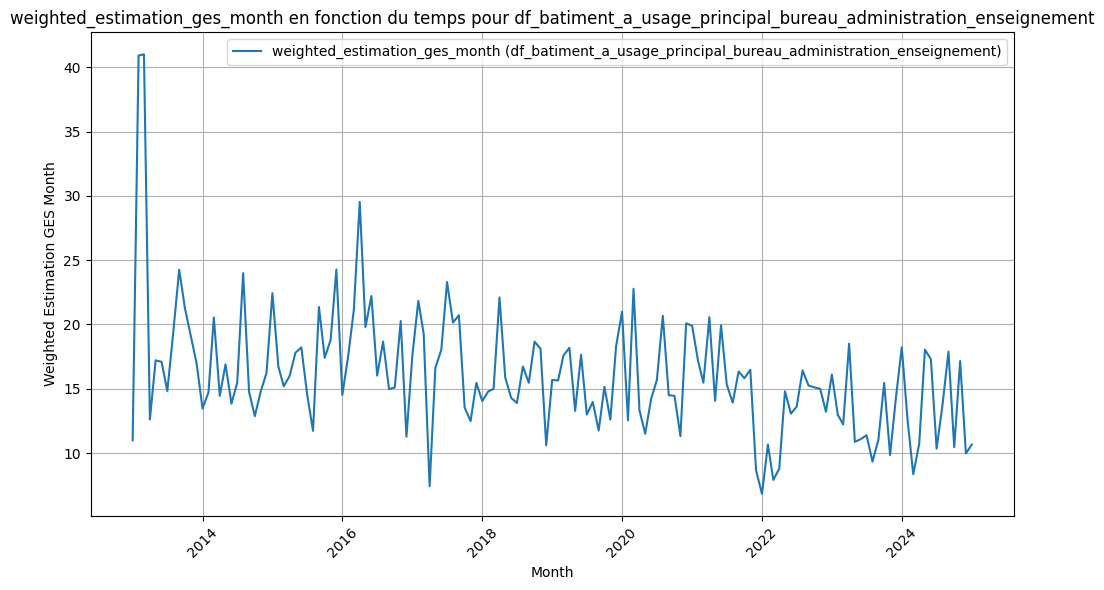

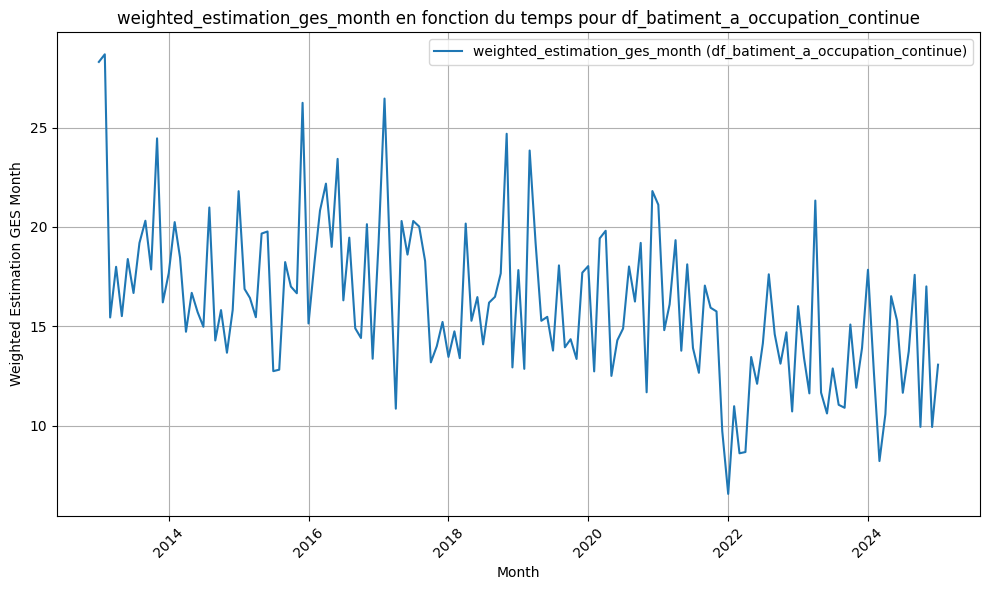

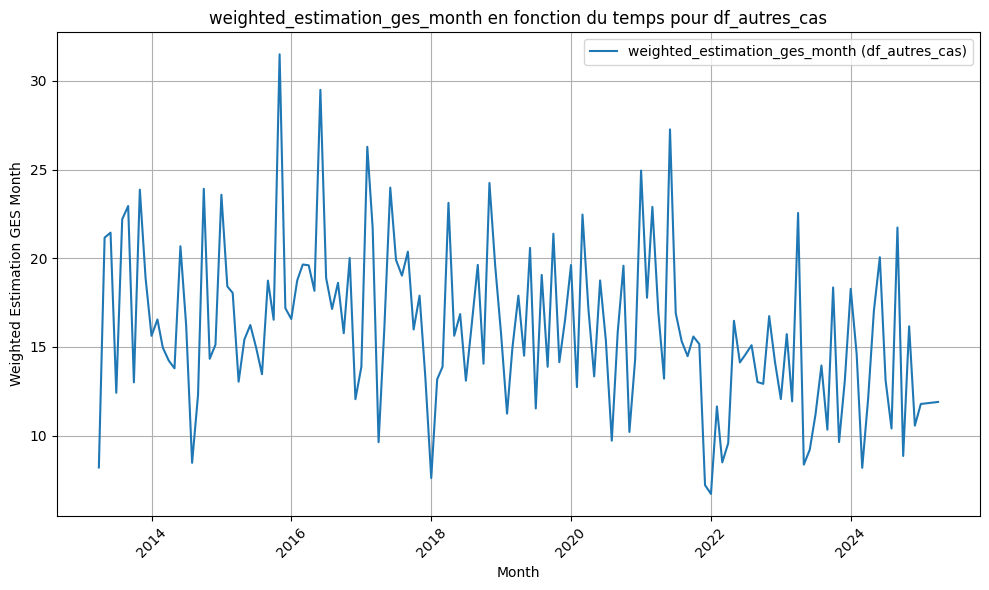

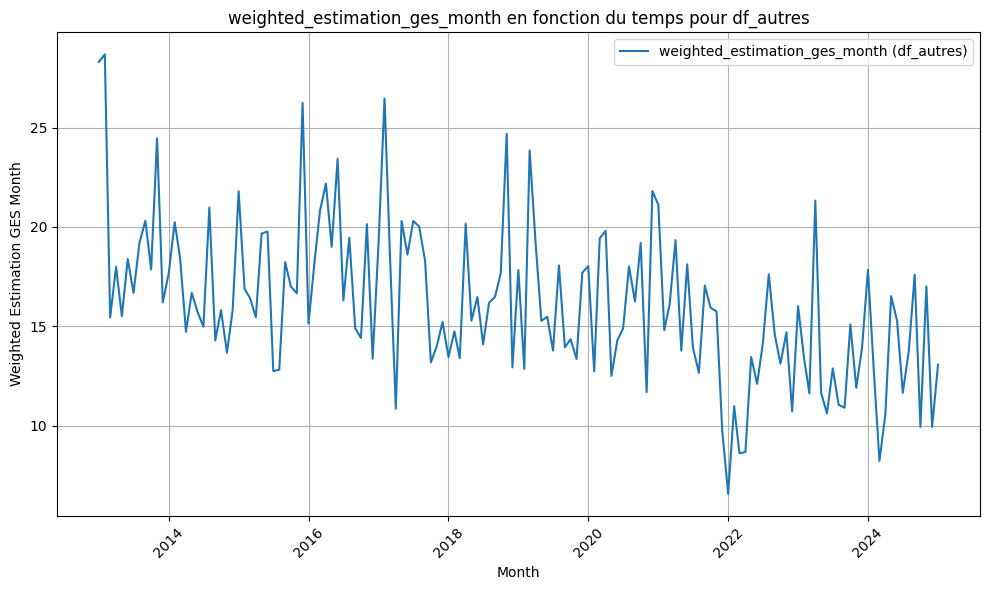

In [50]:
# Liste des DataFrames
dfs = [
    df_centre_commercial,
    df_batiment_a_usage_principal_bureau_administration_enseignement,
    df_batiment_a_occupation_continue,
    df_autres_cas,
    df_autres
]

# Noms des DataFrames pour les titres des graphiques
df_names = [
    'df_centre_commercial',
    'df_batiment_a_usage_principal_bureau_administration_enseignement',
    'df_batiment_a_occupation_continue',
    'df_autres_cas',
    'df_autres'
]

# Création des graphiques
for df, name in zip(dfs, df_names):
    plt.figure(figsize=(10, 6))
    # Conversion de l'index de Period en Timestamp pour l'affichage
    plt.plot(df.index.to_timestamp(), df['weighted_estimation_ges_month'], label=f'weighted_estimation_ges_month ({name})')
    plt.title(f'weighted_estimation_ges_month en fonction du temps pour {name}')
    plt.xlabel('Month')
    plt.ylabel('Weighted Estimation GES Month')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=982.432, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=942.859, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=894.877, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=980.453, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=896.857, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=896.857, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=894.051, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=895.970, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=895.970, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=940.895, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.073 seconds
Best ARIMA parameters for df_centre_commercial:

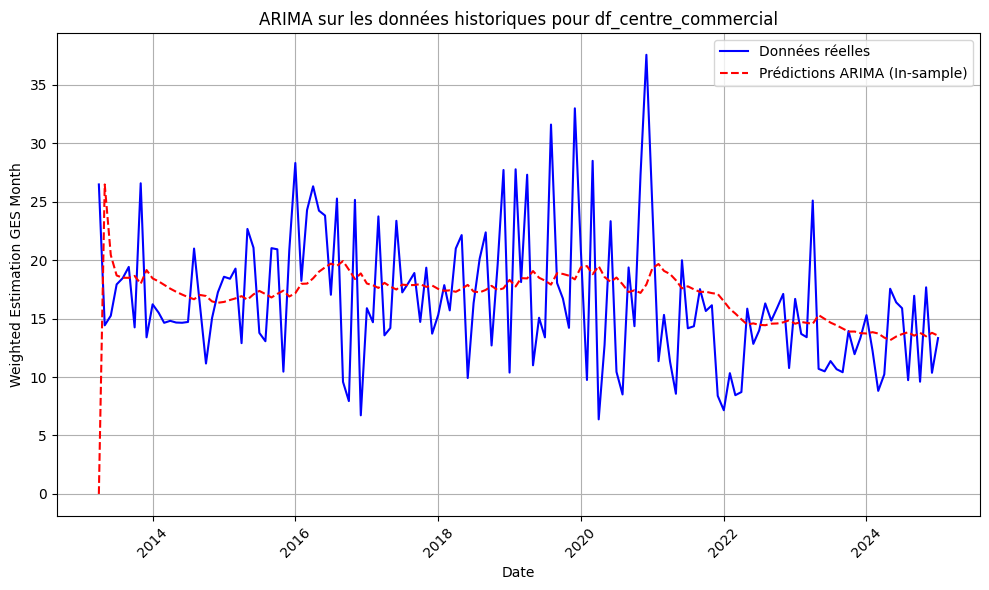

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=915.543, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=901.595, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=913.543, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=874.482, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=870.258, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=863.738, Time=0.65 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=858.589, Time=0.27 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=857.177, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=862.186, Time=0.04 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=853.275, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=851.464, Time=0.11 se

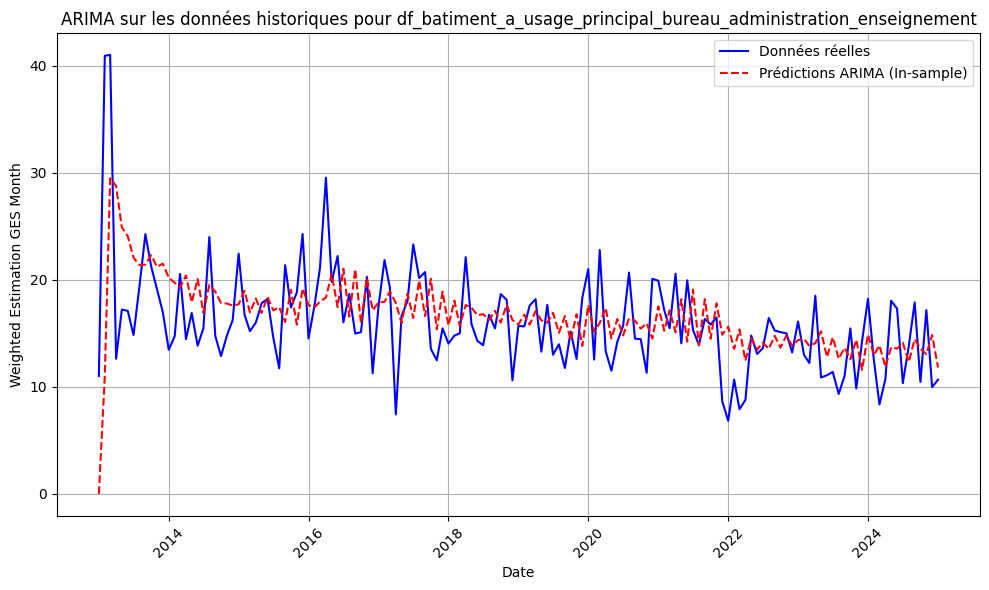

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=853.392, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=818.556, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=851.468, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=799.771, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=796.781, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=794.319, Time=0.10 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=793.123, Time=0.12 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=791.701, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=792.824, Time=0.04 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=786.987, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=785.075, Time=0.07 se

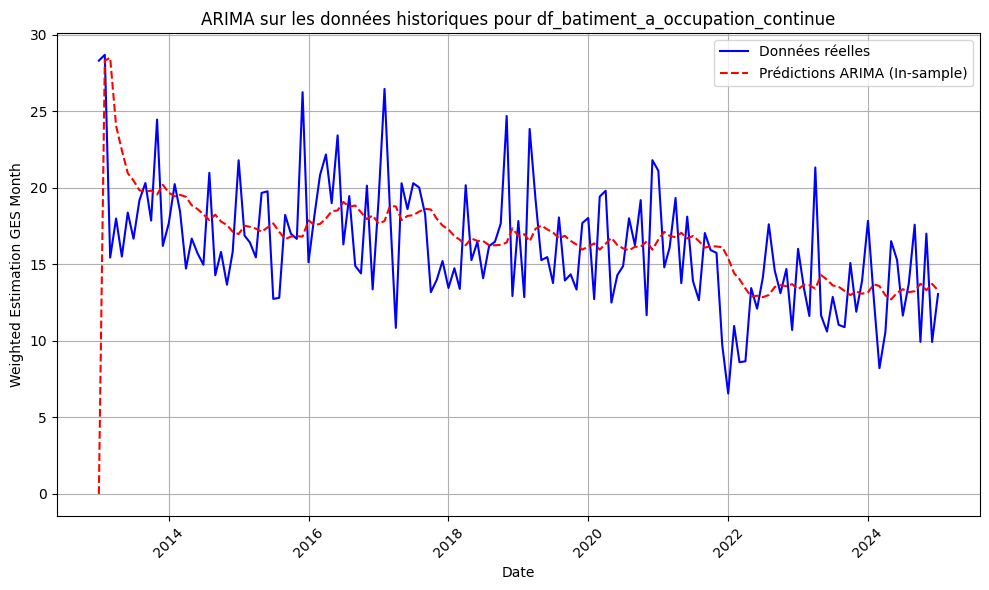

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=924.256, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=891.095, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=922.258, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=859.094, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=853.207, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=851.525, Time=0.10 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=853.201, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=849.581, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=851.239, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=851.265, Time=0.06 sec
 A

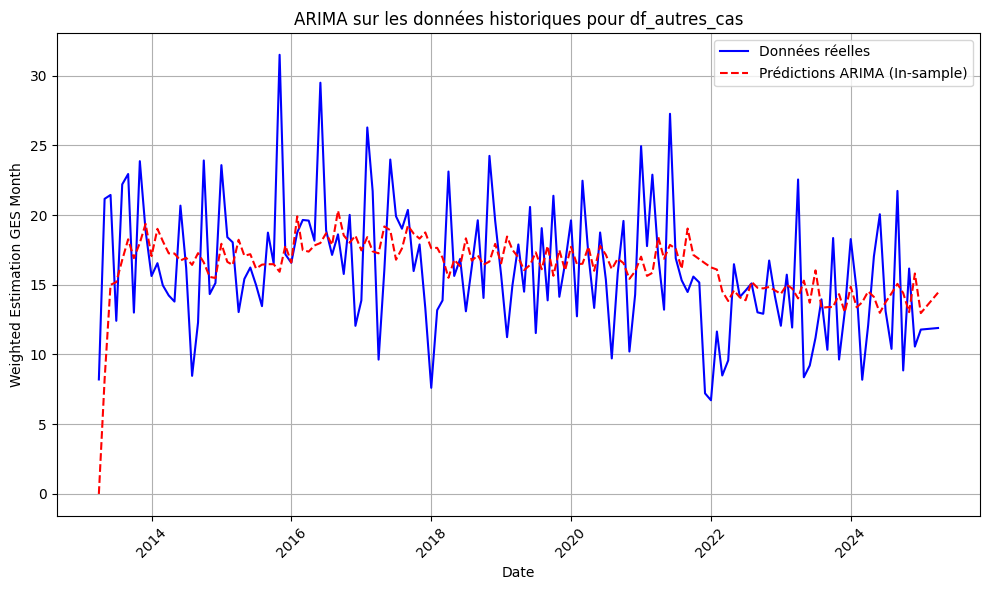

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=853.392, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=818.556, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=851.468, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=799.771, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=796.781, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=794.319, Time=0.12 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=793.123, Time=0.12 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=791.701, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=792.824, Time=0.04 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=786.987, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=785.075, Time=0.12 se

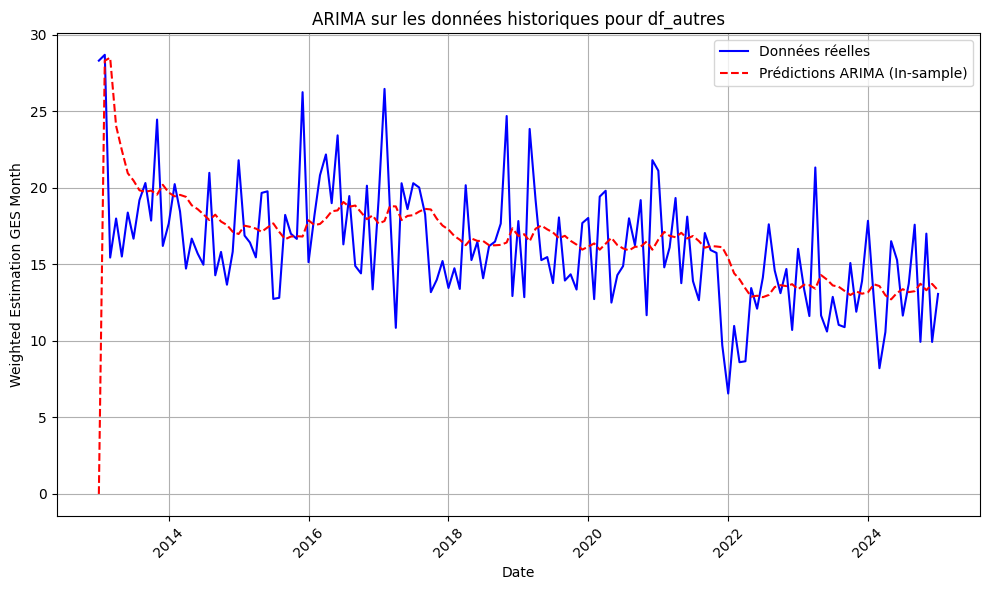

Tableau récapitulatif des modèles ARIMA :
                                           DataFrame ARIMA_order      RMSE  \
0                               df_centre_commercial   (0, 1, 1)  6.095359   
1  df_batiment_a_usage_principal_bureau_administr...   (1, 1, 2)  4.865558   
2                  df_batiment_a_occupation_continue   (0, 1, 1)  4.287530   
3                                      df_autres_cas   (3, 1, 1)  4.547030   
4                                          df_autres   (0, 1, 1)  4.287530   

        MAE   MAPE (%)        R2  
0  4.651436  32.568288  0.013927  
1  3.470976  23.567918  0.023274  
2  3.040775  20.049533  0.107777  
3  3.544375  25.058173  0.034656  
4  3.040775  20.049533  0.107777  


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima  # pip install pmdarima

# Initialisation d'une liste pour stocker le résumé des modèles
summary = []

for df, name in zip(dfs, df_names):
    # Extraction de la série temporelle (on suppose que l'index est en type Period pour la périodicité mensuelle)
    y = df['weighted_estimation_ges_month']
    
    # Ajustement du modèle ARIMA (auto_arima va chercher les meilleurs paramètres)
    model = auto_arima(y, seasonal=False, stepwise=True, trace=True)
    order = model.order
    print(f"Best ARIMA parameters for {name}: {order}")
    
    # Ajuster le modèle ARIMA sur l'ensemble des données
    model.fit(y)
    
    # Prédictions in-sample
    in_sample_predictions = model.predict_in_sample()
    
    # Calcul des métriques
    # RMSE
    rmse = math.sqrt(mean_squared_error(y, in_sample_predictions))
    # MAE
    mae = mean_absolute_error(y, in_sample_predictions)
    # MAPE : pour éviter la division par zéro, on ajoute un petit epsilon
    epsilon = 1e-10
    mape = np.mean(np.abs((y - in_sample_predictions) / (np.abs(y) + epsilon))) * 100
    
    r2 = r2_score(y[1:], in_sample_predictions[1:])
    
    # Stockage dans le résumé
    summary.append({
        'DataFrame': name,
        'ARIMA_order': order,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE (%)': mape,
        'R2': r2
    })
    
    # Tracé des résultats
    plt.figure(figsize=(10, 6))
    # Conversion de l'index en Timestamp pour l'affichage
    plt.plot(df.index.to_timestamp(), y, label='Données réelles', color='blue')
    plt.plot(df.index.to_timestamp(), in_sample_predictions, label='Prédictions ARIMA (In-sample)', color='red', linestyle='--')
    
    plt.title(f'ARIMA sur les données historiques pour {name}')
    plt.xlabel('Date')
    plt.ylabel('Weighted Estimation GES Month')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Affichage du tableau récapitulatif sous forme de DataFrame
summary_df = pd.DataFrame(summary)
print("Tableau récapitulatif des modèles ARIMA :")
print(summary_df)
